In [197]:
import matplotlib.pyplot as plt
import numpy as np

def K_means(number_of_points,number_of_clusters,eps):
    n=number_of_points
    Max_iteration=n
    k=number_of_clusters
    x_scatter = np.random.uniform(0,10,n)
    y_scatter = np.random.uniform(0,10,n)
    k_means   = np.random.uniform(0,10,(k,2))
    l = []
    flag=True

    while(flag):
        l.clear()
        for x,y in zip(x_scatter,y_scatter):
            Min_distance_index=0
            Min_distance=np.linalg.norm(k_means[0]-[x,y])
            for i,k in enumerate(k_means):
                distance= np.linalg.norm(k-[x,y])
                if Min_distance > distance:
                    Min_distance=  distance
                    Min_distance_index=i
            l.append(Min_distance_index)
        clusters= np.array(l)

        old_k_means=np.copy(k_means)
        for i in range(len(k_means)):
            new_center= [np.mean(x_scatter[np.where(clusters==i)]),np.mean(y_scatter[np.where(clusters==i)])]
            distance= float(np.linalg.norm(new_center - k_means[i]))
            if distance > eps:
                k_means[i]=new_center

        comparison= k_means==old_k_means
        equals=comparison.all()

        Max_iteration=Max_iteration-1
        if equals or Max_iteration==0:
            flag=False
    return clusters


In [190]:
number_of_points=100
number_of_clusters=5
eps=0.0001
clusters=K_means(number_of_points,number_of_clusters,eps)
clusters

array([2, 1, 1, 1, 2, 2, 3, 4, 0, 0, 4, 1, 3, 3, 1, 1, 0, 1, 0, 1, 0, 3,
       4, 4, 1, 2, 1, 0, 1, 4, 1, 4, 0, 2, 4, 1, 3, 3, 2, 0, 1, 0, 0, 3,
       4, 4, 2, 0, 1, 2, 1, 2, 3, 1, 2, 0, 2, 3, 1, 2, 0, 1, 3, 4, 0, 0,
       3, 2, 2, 0, 4, 1, 0, 3, 0, 4, 2, 1, 4, 2, 4, 4, 2, 2, 0, 1, 3, 4,
       2, 3, 2, 1, 4, 4, 3, 1, 2, 3, 4, 2])

# |   Down
# |
# |
# |   Same function With Plotting and Colors !!!
# |
# |
# v



In [200]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np

def K_means_colors(number_of_points,number_of_clusters,eps):
    n=number_of_points
    Max_iteration=n
    k=number_of_clusters
    x_scatter = np.random.uniform(0,10,n)
    y_scatter = np.random.uniform(0,10,n)
    k_means   = np.random.uniform(0,10,(k,2))
    color = []
    for i in range(len(k_means)):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    l = []
    flag=True

    while(flag):
        l.clear()
        for x,y in zip(x_scatter,y_scatter):
            Min_distance_index=0
            Min_distance=np.linalg.norm(k_means[0]-[x,y])
            for i,k in enumerate(k_means):
                distance= np.linalg.norm(k-[x,y])
                if Min_distance > distance:
                    Min_distance=  distance
                    Min_distance_index=i
            l.append(Min_distance_index)
        clusters= np.array(l)

        old_k_means=np.copy(k_means)
        for i in range(len(k_means)):
            new_center= [np.mean(x_scatter[np.where(clusters==i)]),np.mean(y_scatter[np.where(clusters==i)])]
            distance= float(np.linalg.norm(new_center - k_means[i]))
            if distance >eps:
                k_means[i]=new_center

        comparison= k_means==old_k_means
        equals=comparison.all()
        Max_iteration=Max_iteration-1
        
    #---------------
        if equals or Max_iteration==0:
            flag=False
    color_clusters= np.array(['']*n, dtype='object')
    for i in range(len(k_means)):
        color_clusters[np.where(clusters==i)]=color[i]
    plt.rcParams["figure.figsize"] = (10,7)
    plt.scatter(x_scatter, y_scatter, c=list(color_clusters), marker="o");
    plt.scatter(k_means[:,0], k_means[:,1], c='red', marker="o",s=100);
    return clusters



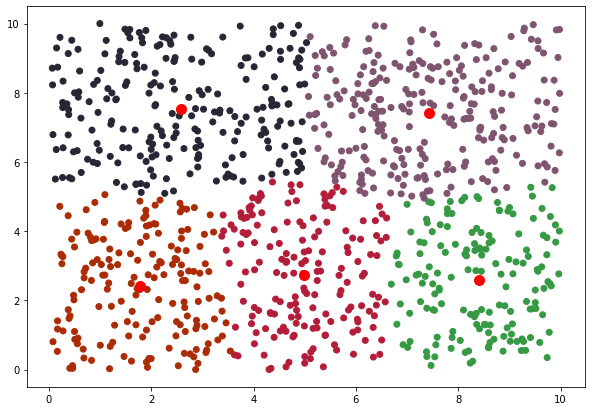

In [204]:
number_of_points=1000
number_of_clusters=5
eps=0.0001
clusters=K_means_colors(number_of_points,number_of_clusters,eps)


# Big Red Points are centers